In [16]:
import pandas as pd 
import numpy as np


#viz Libraries
import matplotlib.pyplot as plt

plt.style.use('ggplot')
import seaborn as sns


#datetime
import datetime as dt


%matplotlib inline



This customer analysis will demonstrate what type of analytics we can do with Customer Number, Order Number, Sales Value etc. 

The dataset is a typical example of retail data - with multiple orders from different customers. 

I will be demonstrating how to segment customers and provide them with an RFM score.


In [8]:
##first, read in the data set

orders = pd.read_csv('/Users/jacksmac/Downloads/sales_data_sample.csv' ,encoding = 'unicode_escape')

In [10]:
##what type of data are we looking at.
orders.describe(include = 'all')



,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823,2823.000000,2823.000000,2823.00000,...,2823,302,2823,1337,2747,2823,1749,2823,2823,2823
unique,NaN,NaN,NaN,NaN,NaN,252,6,NaN,NaN,NaN,...,92,9,73,16,73,19,3,77,72,3
top,NaN,NaN,NaN,NaN,NaN,11/14/2003 0:00,Shipped,NaN,NaN,NaN,...,"C/ Moralzarzal, 86",Level 3,Madrid,CA,28034,USA,EMEA,Freyre,Diego,Medium
freq,NaN,NaN,NaN,NaN,NaN,38,2617,NaN,NaN,NaN,...,259,55,304,416,259,1004,1407,259,259,1384
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,NaN,NaN,2.717676,7.092455,2003.81509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,NaN,1.203878,3.656633,0.69967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10100.000000,6.000000,26.880000,1.000000,482.130000,NaN,NaN,1.000000,1.000000,2003.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,NaN,NaN,2.000000,4.000000,2003.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,NaN,NaN,3.000000,8.000000,2004.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,NaN,NaN,4.000000,11.000000,2004.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 2823 rows, made up of 252 distinct dates.
We will have to concatenate Firstname and Lastname, to get customer nbr.

There are 19 unique countries which make up sales. There are no negatice values on price, quantity or sales - which is good.

Mean price is 83, mean quantity is 35.

In [12]:
##which rows are null? 
##remove the ones which are useless

orders.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [13]:
to_drop = ['ADDRESSLINE2', 'STATE', 'TERRITORY']
orders.drop(to_drop, axis = 1)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,NaN,USA,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


What is the % split of order status?



In [14]:
orders['STATUS'].value_counts(normalize = True)

Shipped       0.927028
Cancelled     0.021254
Resolved      0.016649
On Hold       0.015586
In Process    0.014524
Disputed      0.004959
Name: STATUS, dtype: float64

In [15]:
#change orders to date
orders['ORDERDATE'] = pd.to_datetime(orders['ORDERDATE'])

In [18]:
# Calculate Recency, Frequency and Monetary value for each customer
last_date = orders['ORDERDATE'].max() + dt.timedelta(days=1) #latest date in the data set

##now aggregate on frequency, receny and sales

orders_RFM = orders.groupby(['CUSTOMERNAME']).agg({
    'ORDERDATE': lambda x: (last_date - x.max()).days,
    'ORDERNUMBER': 'count',
    'SALES':'sum'})

#Renaming the columns
orders_RFM.rename(columns={'ORDERDATE': 'Recency',
                   'ORDERNUMBER': 'Frequency',
                   'SALES': 'MonetaryValue'}, inplace=True)

In [20]:
orders_RFM.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


In [36]:
#Dividing into segments

# Create a spend quartile with 5 groups - a range between 1 and 6
MonetaryValue_quartile = pd.qcut(orders_RFM['MonetaryValue'], q=5, labels=range(1,6))
Recency_quartile = pd.qcut(orders_RFM['Recency'], q=5, labels=list(range(5, 0, -1)))
Frequency_quartile = pd.qcut(orders_RFM['Frequency'], q=5, labels=range(1,6))


# Assign the quartile values to the Spend_Quartile column in data
orders_RFM['R'] = Recency_quartile.astype(int)
orders_RFM['F'] = Frequency_quartile.astype(int)
orders_RFM['M'] = MonetaryValue_quartile.astype(int)

orders_RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,51,157807.81,3,5,5,13
Alpha Cognac,65,20,70488.44,4,2,2,8
Amica Models & Co.,265,26,94117.26,1,3,3,7
"Anna's Decorations, Ltd",84,46,153996.13,4,5,5,14
Atelier graphique,188,7,24179.96,3,1,1,5


In [28]:
orders_RFM['RFM'] = orders_RFM[['R','F','M']].sum(axis=1).astype(int)
orders_RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,51,157807.81,3,5,5,13
Alpha Cognac,65,20,70488.44,4,2,2,8
Amica Models & Co.,265,26,94117.26,1,3,3,7
"Anna's Decorations, Ltd",84,46,153996.13,4,5,5,14
Atelier graphique,188,7,24179.96,3,1,1,5


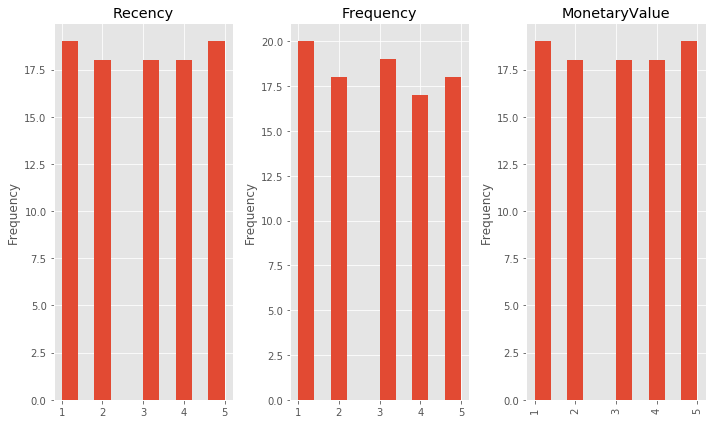

In [37]:
plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
orders_RFM['R'].plot(kind='hist')
plt.title('Recency')

plt.subplot(1,3,2)
orders_RFM['F'].plot(kind='hist')
plt.title('Frequency')

plt.subplot(1,3,3)
orders_RFM['M'].plot(kind='hist')
plt.xticks(rotation = 90)
plt.title('MonetaryValue')

plt.tight_layout()
plt.show()

We can now use this code to segment our customers effectively, and market to them appropriately. 

Typically, low recency scores need reactivation.
Low frequency will need encouragment to make incremental orders
Low monetary value should be encouraged to stretch their abv and spend.